In [6]:
import os
import time
import time
from datetime import datetime
import numpy as np
import pickle
import pandas as pd
os.chdir("../")
from helpers.planes import random_orthogonal_unit_vectors
from helpers.group_helpers import loadsyms
from helpers.compare_helpers import appendtoPXS
from jointpdfpython3.JointProbabilityMatrix import JointProbabilityMatrix
os.chdir("./plot_notebooks")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

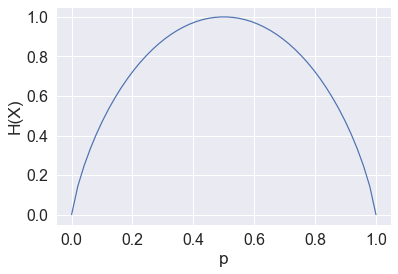

In [3]:
x = np.linspace(0.000001,0.999999)
y = [(i*-np.log2(i))+((1-i)*-np.log2(1-i)) for i in x]
d = pd.DataFrame(data={'p':x,'H(X)':y})

# Largest Context:
sns.set_context("paper", font_scale = 1.8, rc={"grid.linewidth": 1})
lineplot = sns.lineplot(data=d,x='p',y='H(X)')
fig = lineplot.get_figure()
# fig.savefig("out.png") 

## Test runtime to append SRV

In [10]:
lenX=2
states=2
jX=JointProbabilityMatrix(lenX,states)
pX=jX.joint_probabilities.joint_probabilities
subjects=np.arange(lenX)
concsyms, syms = loadsyms(states)

s = syms['PSRVs'][0]
pXSym = pX
data={'numvars':[],'runtime to append':[]}
for i in range(20):
    print("i",i,datetime.fromtimestamp(time.time()))
    bef = time.time()
    pXSym = appendtoPXS(lenX,pX,pXSym,s)
    data['runtime to append'].append(time.time()-bef)
    data['numvars'].append(i+1)

PSRVs 1
noisy 2
lower order 0
oversized 68
i 0 2022-06-03 12:04:01.910035
i 1 2022-06-03 12:04:01.910035
i 2 2022-06-03 12:04:01.911032
i 3 2022-06-03 12:04:01.911032
i 4 2022-06-03 12:04:01.911032
i 5 2022-06-03 12:04:01.912030
i 6 2022-06-03 12:04:01.913027
i 7 2022-06-03 12:04:01.915022
i 8 2022-06-03 12:04:01.918014
i 9 2022-06-03 12:04:01.924994
i 10 2022-06-03 12:04:01.936004
i 11 2022-06-03 12:04:01.962892
i 12 2022-06-03 12:04:02.045671
i 13 2022-06-03 12:04:02.222198
i 14 2022-06-03 12:04:02.614148
i 15 2022-06-03 12:04:03.132761
i 16 2022-06-03 12:04:04.241812
i 17 2022-06-03 12:04:06.392231
i 18 2022-06-03 12:04:10.382793
i 19 2022-06-03 12:04:18.519077


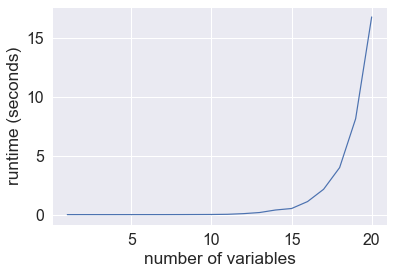

In [11]:
d = pd.DataFrame(data={'runtime (seconds)':data['runtime to append'],'number of variables':data['numvars']})

# Largest Context:
sns.set_context("paper", font_scale = 1.8, rc={"grid.linewidth": 1})
lineplot = sns.lineplot(data=d,y='runtime (seconds)',x='number of variables')
fig = lineplot.get_figure()
# fig.savefig("out.png") 

## 3 random planes

In [15]:
def get_plane_points(v1,v2,mag=1,steps=20,mid=[]):
    mag = 1
    dim = len(v1)
    v3 = (v1*mag)
    v4 = (v2*mag)
    # get plane given random orthogonal unit vectors
    if mid:
        plane1 = np.linspace(mid - (0.5*v3),mid + (0.5*v3),num=steps)
        plane2 = np.linspace(mid - (0.5*v4),mid + (0.5*v4),num=steps)
    else:
        plane1 = np.linspace(np.zeros(dim),v3,num=steps)
        plane2 = np.linspace(np.zeros(dim),v4,num=steps)
    plane = []
    for p1 in plane1:
        for p2 in plane2:
            plane.append(p1+(p2))
    return np.array(plane)

lenX = 2
states = 2
# 1 random plane
dim = 3
mag = 1
mid = [0.5 for _ in range(dim)]
plane_steps = 20

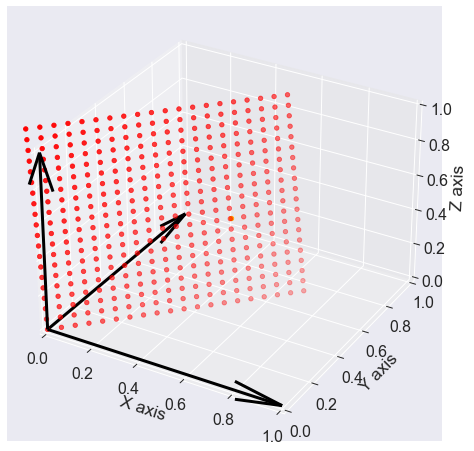

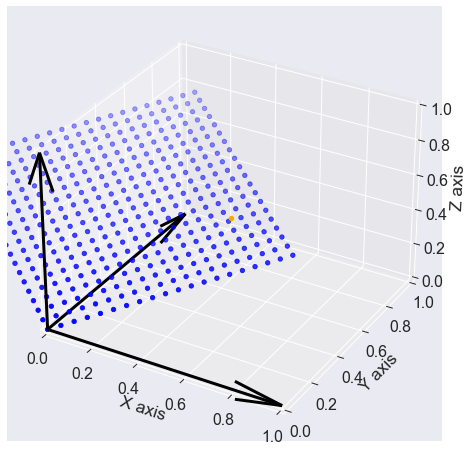

In [16]:
# 3D representation of the orthogonal vectors
colors = ['red','blue']
for c in colors:

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(mid[0],mid[1],mid[2],color='orange') # plot middle oi
    ax.quiver(0,0,0,0,0,1, color = 'black', lw=3, arrow_length_ratio=0.2) # z axis
    ax.quiver(0,0,0,0,1,0, color = 'black', lw=3, arrow_length_ratio=0.2) # y axis
    ax.quiver(0,0,0,1,0,0, color = 'black', lw=3, arrow_length_ratio=0.2) # x axis

    # get plane given random orthogonal unit vectors
    v1, v2 = random_orthogonal_unit_vectors(dim)
    plane = get_plane_points(v1,v2,mag=mag,steps=plane_steps)
    ax.scatter(plane[:,0],plane[:,1],plane[:,2],color=c)

    ax.set_xlim([0, 1]), ax.set_ylim([0, 1]), ax.set_zlim([0, 1])
    ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
    plt.show()
    

## Translate plane origin from (0,0,0) to (1/2,1/2,1/2)

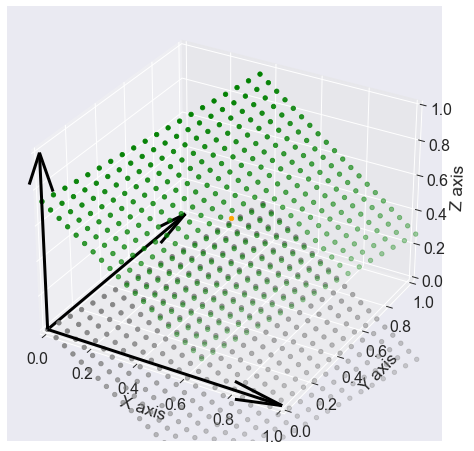

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mid[0],mid[1],mid[2],color='orange') # plot middle oi
ax.quiver(0,0,0,0,0,1, color = 'black', lw=3, arrow_length_ratio=0.2) # z axis
ax.quiver(0,0,0,0,1,0, color = 'black', lw=3, arrow_length_ratio=0.2) # y axis
ax.quiver(0,0,0,1,0,0, color = 'black', lw=3, arrow_length_ratio=0.2) # x axis

v1, v2 = random_orthogonal_unit_vectors(dim)
plane = get_plane_points(v1,v2,steps=plane_steps)
steps = 20
shifted_plane1 = np.linspace(mid - (0.5*v1),mid + (0.5*v1),steps)
shifted_plane2 = np.linspace(mid - (0.5*v2),mid + (0.5*v2),steps)
shifted_plane = []
for p1 in shifted_plane1:
    for p2 in shifted_plane2:
        shifted_plane.append(p1+(p2-mid))
shifted_plane = np.array(shifted_plane)

ax.scatter(shifted_plane[:,0],shifted_plane[:,1],shifted_plane[:,2],color='green')
ax.scatter(plane[:,0],plane[:,1],plane[:,2],color='grey')
    
ax.set_xlim([0, 1]), ax.set_ylim([0, 1]), ax.set_zlim([0, 1])
ax.set_xlabel('X axis'), ax.set_ylabel('Y axis'), ax.set_zlabel('Z axis')
plt.show()